In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.linear_model import LogisticRegression

In [4]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [127]:
logreg = LogisticRegression(solver = 'lbfgs')

In [6]:
data = pd.read_csv('income.csv')

In [7]:
data.shape

(31978, 13)

In [8]:
data.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [9]:
data.describe()

,age,capitalgain,capitalloss,hoursperweek
count,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1064.360623,86.739352,40.417850
std,13.662085,7298.596271,401.594301,12.345285
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [10]:
df = data.copy()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
age              31978 non-null int64
JobType          31978 non-null object
EdType           31978 non-null object
maritalstatus    31978 non-null object
occupation       31978 non-null object
relationship     31978 non-null object
race             31978 non-null object
gender           31978 non-null object
capitalgain      31978 non-null int64
capitalloss      31978 non-null int64
hoursperweek     31978 non-null int64
nativecountry    31978 non-null object
SalStat          31978 non-null object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


# Dependent Variable
Categorical or Binary

# Independent Variable
Numerical + categorical

In [12]:
#x_train,y_train,x_test,true_p = train_test_split(data,0.8)

In [13]:
data.isnull().sum()

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

In [14]:
data.describe(include = "O")

,JobType,EdType,maritalstatus,occupation,relationship,race,gender,nativecountry,SalStat
count,31978,31978,31978,31978,31978,31978,31978,31978,31978
unique,9,16,7,15,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,"less than or equal to 50,000"
freq,22286,10368,14692,4038,12947,27430,21370,29170,24283


In [15]:
data['JobType'].value_counts()

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 ?                    1809
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: JobType, dtype: int64

In [16]:
data.shape

(31978, 13)

In [17]:
# unique() function of numpy
np.unique(data['JobType'])

array([' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ' Private',
       ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay'],
      dtype=object)

In [18]:
np.unique(data['occupation'])

array([' ?', ' Adm-clerical', ' Armed-Forces', ' Craft-repair',
       ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners',
       ' Machine-op-inspct', ' Other-service', ' Priv-house-serv',
       ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support',
       ' Transport-moving'], dtype=object)

In [19]:
data = pd.read_csv('income.csv',na_values = ['?'])

In [20]:
data.isnull().sum()

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

In [21]:
d = data[data.isnull().any(axis = 1)]

In [22]:
d

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat


In [23]:
df = data.copy()

In [24]:
df.shape

(31978, 13)

In [25]:
df.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [26]:
df_new = pd.read_csv('income.csv',na_values = ['?'])

In [27]:
df1n = df_new.dropna(axis = 0)

In [28]:
df1n

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"
5,44,Private,HS-grad,Widowed,Exec-managerial,Unmarried,Black,Female,0,0,40,United-States,"less than or equal to 50,000"
6,51,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,"less than or equal to 50,000"
7,20,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
8,17,?,11th,Never-married,?,Own-child,White,Female,0,0,5,United-States,"less than or equal to 50,000"
9,19,Private,HS-grad,Never-married,Machine-op-inspct,Own-child,Black,Female,0,0,40,United-States,"less than or equal to 50,000"


In [29]:
# correlation between independent variables
corr_rel = df1n.corr()

In [30]:
corr_rel

,age,capitalgain,capitalloss,hoursperweek
age,1.000000,0.077490,0.057282,0.068299
capitalgain,0.077490,1.000000,-0.031499,0.079112
capitalloss,0.057282,-0.031499,1.000000,0.053106
hoursperweek,0.068299,0.079112,0.053106,1.000000


In [31]:
df1n.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

In [32]:
gender_tab = pd.crosstab(index = df1n['gender'],columns ='counts',normalize = True)

In [33]:
gender_tab

col_0,counts
gender,
Female,0.331728
Male,0.668272


In [34]:
gender_salstat = pd.crosstab(index = df1n['gender'],columns = df1n['SalStat'],margins = True,normalize = 'index')#(True)

In [35]:
gender_salstat

SalStat,"greater than 50,000","less than or equal to 50,000"
gender,,
Female,0.109540,0.890460
Male,0.305709,0.694291
All,0.240634,0.759366


In [36]:
# Bar plot b/w Salary Status

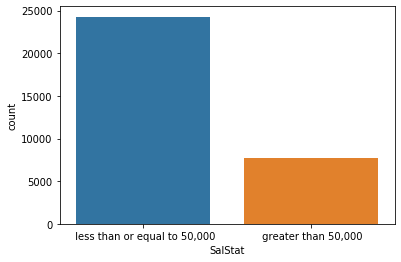

In [37]:
salstat = sns.countplot(df1n['SalStat'])

Finding Age Frequency

In [38]:
data = pd.read_csv('income.csv',na_values = ['?'])

In [39]:
data2 = data.dropna(axis = 0)

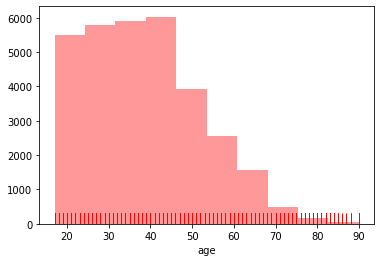

In [40]:
sns.distplot(data2['age'],bins=10,kde = False,rug = True,color = 'red',vertical=False) #kde = kernel-distance-estimate
# we wont get the frequency line as shown below

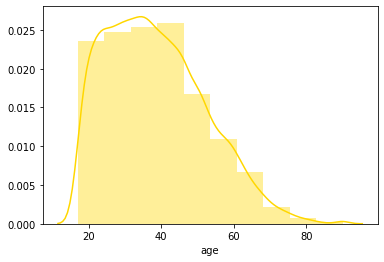

In [41]:
sns.distplot(data2['age'],bins=10,kde = True,color = 'gold')

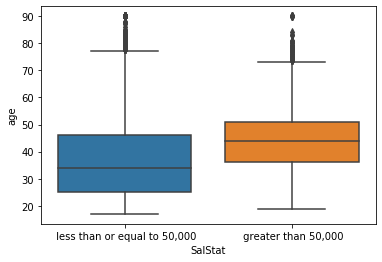

In [42]:
sns.boxplot(x = data2['SalStat'],y = data2['age'])

Exploration of Jobtype vs Salary Status

In [43]:
gender_salstat = pd.crosstab(index = data2['gender'],columns = data2['SalStat'],margins = True,normalize = 'index')#(True)

In [44]:
gender_salstat

SalStat,"greater than 50,000","less than or equal to 50,000"
gender,,
Female,0.109540,0.890460
Male,0.305709,0.694291
All,0.240634,0.759366


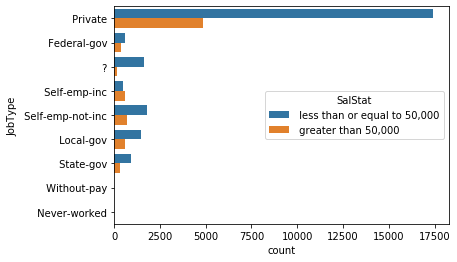

In [45]:
sns.countplot(y = 'JobType',data = data2,hue = 'SalStat')#(orient = 'h')

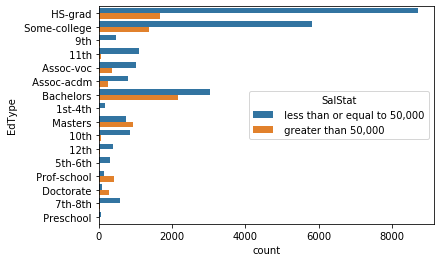

In [46]:
sns.countplot(y = 'EdType',data = data2,hue = 'SalStat')

In [47]:
ed_tab = pd.crosstab(index = data2['EdType'],columns = data2['SalStat'],normalize = 'index',margins = True)

In [48]:
ed_tab

SalStat,"greater than 50,000","less than or equal to 50,000"
EdType,,
10th,0.066232,0.933768
11th,0.050557,0.949443
12th,0.074341,0.925659
1st-4th,0.036810,0.963190
5th-6th,0.044025,0.955975
7th-8th,0.059011,0.940989
9th,0.051383,0.948617
Assoc-acdm,0.248341,0.751659
Assoc-voc,0.261347,0.738653


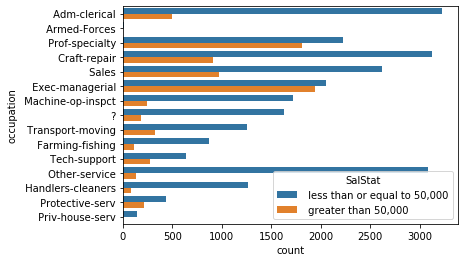

In [49]:
sns.countplot(y = 'occupation',data = data2,hue = 'SalStat')

In [50]:
occup_tab = pd.crosstab(index = data2['occupation'],columns = data2['SalStat'],normalize = 'index',margins = True)

In [51]:
occup_tab

SalStat,"greater than 50,000","less than or equal to 50,000"
occupation,,
?,0.102974,0.897026
Adm-clerical,0.133835,0.866165
Armed-Forces,0.111111,0.888889
Craft-repair,0.225310,0.774690
Exec-managerial,0.485220,0.514780
Farming-fishing,0.116279,0.883721
Handlers-cleaners,0.061481,0.938519
Machine-op-inspct,0.124619,0.875381
Other-service,0.041096,0.958904


In [95]:
data1 = pd.read_csv('income.csv')

In [96]:
data2 = data1.dropna(axis = 0)

In [97]:
data2['SalStat'].value_counts()

 less than or equal to 50,000    24283
 greater than 50,000              7695
Name: SalStat, dtype: int64

In [98]:
cat_salstat = {'less than or equal to 50,000':0,'greater than 50,000':1}

In [99]:
data2['SalStat'].replace(cat_salstat,inplace = True)

In [100]:
data2['SalStat'].head(6)

0     less than or equal to 50,000
1     less than or equal to 50,000
2              greater than 50,000
3     less than or equal to 50,000
4     less than or equal to 50,000
5     less than or equal to 50,000
Name: SalStat, dtype: object

In [101]:
new_data = pd.get_dummies(data2,drop_first = True) # DOING ONE-HOT ENCODING !

In [102]:
new_data.head(6)

,age,capitalgain,capitalloss,hoursperweek,JobType_ Federal-gov,JobType_ Local-gov,JobType_ Never-worked,JobType_ Private,JobType_ Self-emp-inc,JobType_ Self-emp-not-inc,...,nativecountry_ Puerto-Rico,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia,"SalStat_ less than or equal to 50,000"
0,45,0,0,28,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
1,24,0,0,40,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,44,0,0,40,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,27,0,0,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,20,0,0,35,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
5,44,0,0,40,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


In [103]:
column_list = list(new_data.columns)

In [104]:
features = list(set(column_list) - set(['SalStat']))
#(features)

In [105]:
y = new_data['SalStat_ less than or equal to 50,000'].values

In [148]:
len(y)

31978

In [107]:
x = new_data[features].values

In [149]:
len(x)

31978

In [109]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size = 0.3,random_state = 0)

In [118]:
len(train_x)

22384

In [119]:
len(train_y)

22384

In [120]:
len(test_x)

9594

In [121]:
len(test_y)

9594

In [114]:
new_data.shape

(31978, 98)

In [128]:
logreg.fit(train_x,train_y)

C:\Users\Nishchal Singi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [130]:
a = logreg.predict(train_x) # prediction from test data

In [150]:
len(a)

22384

In [132]:
logreg.score(test_x,test_y)

0.9996873045653534

In [133]:
logreg.score(train_x,train_y)

0.9999106504646176

In [135]:
from sklearn import metrics

In [138]:
#print("Accuracy:",metrics.accuracy_score(test_x,a))
#print("Precision:",metrics.precision_score(test_x,a))
#print("Recall:",metrics.recall_score(test_x,a))

In [142]:
logreg.coef_

array([[ 3.61990549e-01, -2.46931055e-03,  6.25989213e-03,
         8.51042748e-01, -1.74193511e-01,  2.90580689e-01,
        -9.94146665e-01,  1.17600538e-01,  5.53199924e-01,
        -6.22097468e-02,  2.08155776e-01,  9.10152239e-01,
         3.22923116e-03,  7.84048686e-03,  1.39078145e+00,
        -3.01796969e-02,  1.92248801e-02,  1.60105222e-01,
         2.87106369e-01, -6.25754155e-02, -5.11302615e-03,
         2.20101830e-02,  9.99214114e-02, -6.33064417e-01,
         1.31048717e-02, -1.39899479e-01, -3.21891829e-01,
         2.62185852e-02, -4.60452442e-01,  2.67323266e-02,
         9.47891802e-03,  3.95062386e-02,  1.03517949e-02,
        -1.04150288e-01,  3.38686866e-02,  2.25534333e-03,
         4.56670730e-02,  1.32251910e-03,  2.68691352e-02,
         3.91536975e-01,  3.29750745e-01, -1.10729341e+00,
         1.45840788e-02,  3.29696891e-01,  1.49512672e-01,
        -3.33744058e-01,  9.85614658e-04,  4.23326794e-02,
         4.90012603e-03,  5.55486245e-02, -1.93168234e-0

In [140]:
logreg.intercept_

array([0.96502228])

In [143]:
# Confusion matrix --> To display correctly classified data and wrongly classified data

In [153]:
confus_matrix = confusion_matrix(test_x,a)

ValueError: Found input variables with inconsistent numbers of samples: [9594, 22384]

In [146]:
accu_score = accuracy_score(test_y,a)

ValueError: Found input variables with inconsistent numbers of samples: [9594, 22384]